<a href="https://colab.research.google.com/github/beameireles/beameireles.github.io/blob/main/Imersao_em_dadosI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar pacotes
# Mercado Financeiro B3
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# Pacotes

# Bibliotecas de modelagem
import pandas as pd
import numpy as np
import pandas_datareader.data as web

# bibliotecas de analises graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Analises graficas de alto nivel
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Data
import datetime

# yahoo finance
import yfinance as yf

# Arg personalizado
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

# API YAHOO FINANCE
### O yfinance oferece uma maneira segmentada e pythonic de baixar dados de mercado do Yahoo Finanças

In [ ]:
# Especificar o simbolo da ação e o periodo de tempo desejado
Simbolo = 'BTC-USD'

# 1º Opção
Inicio = '2021-11-24'
Fim = '2023-11-24'
# Dados = web.get_data_yahoo( Simbolo, start=Inicio, end=Fim )

# 2º Opção
Periodo = '6mo'
# Dados = web.get_data_yahoo( Simbolo, period=Periodo )

# Coletando os dados
Dados = web.get_data_yahoo( Simbolo, period=Periodo )
Dados.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943


In [ ]:
# Tipo da Informação
type( Dados )

pandas.core.frame.DataFrame

In [ ]:
# Ultimos registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,34732.324219,17158456701
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,35082.195312,9561294264
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996
2023-11-06,35044.789062,35286.027344,34765.363281,35037.371094,35037.371094,12693436420
2023-11-07,35047.792969,35047.792969,34583.460938,34780.683594,34780.683594,13527519232


In [ ]:
# Estatisticas Descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,28423.591818,28816.012120,28073.563397,28455.144626,28455.144626,1.386165e+10
std,2415.446670,2497.988773,2405.256421,2458.682997,2458.682997,5.771472e+09
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,26564.056641,26888.882812,26240.701172,26567.632812,26567.632812,1.044652e+10
50%,27654.636719,28047.238281,27215.552734,27658.775391,27658.775391,1.281083e+10
75%,29896.382812,30199.433594,29638.095703,29909.337891,29909.337891,1.565637e+10
max,35441.578125,35919.843750,34765.363281,35437.253906,35437.253906,4.493500e+10


In [ ]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2023-05-07 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       185 non-null    float64
 1   High       185 non-null    float64
 2   Low        185 non-null    float64
 3   Close      185 non-null    float64
 4   Adj Close  185 non-null    float64
 5   Volume     185 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


# Média Móvel
##### Indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

###### MMA = Soma dos preços de fechamento / Numero de dias

In [ ]:
# Media simples
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [ ]:
# Periodo da MMA
n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 } ')

0ª Dia: 13.4 
1ª Dia: 11.2 
2ª Dia: 8.8 


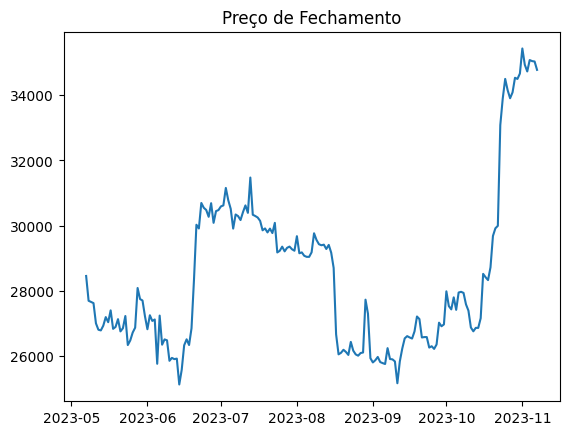

In [ ]:
# Plot
plt.plot( Dados['Close'])
plt.title('Preço de Fechamento');

# Função Rolling
rolling() é uma função do pandas que permite calcular estatisticas em janelas deslizantes de daods.
Util pra calcular media movel, desvio padrao, somatoria, min e max, etc.

In [ ]:
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

Date
2023-05-07             NaN
2023-05-08             NaN
2023-05-09             NaN
2023-05-10             NaN
2023-05-11    27686.114453
                  ...     
2023-11-03    34855.592969
2023-11-04    34971.559375
2023-11-05    35047.874219
2023-11-06    34967.897656
2023-11-07    34936.385938
Name: Close, Length: 185, dtype: float64

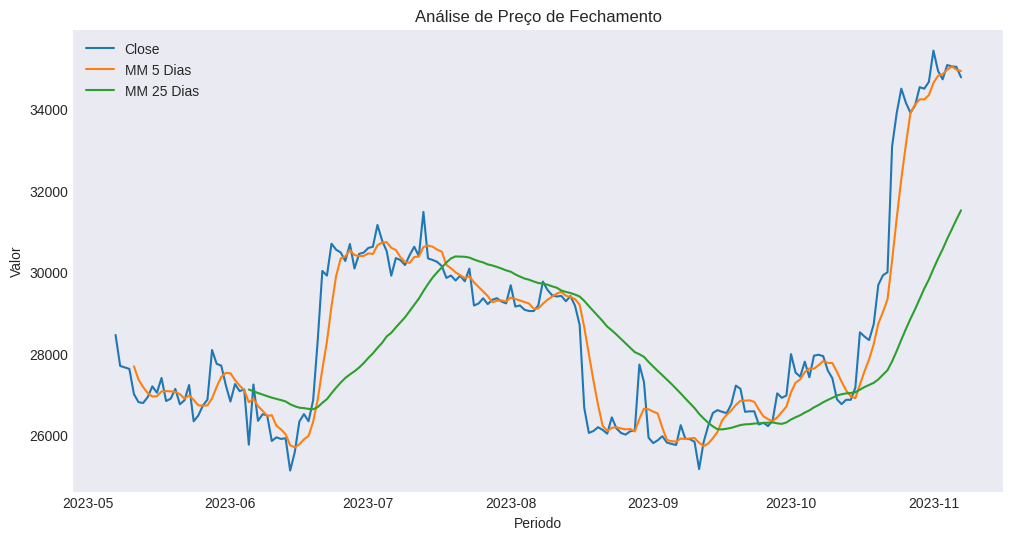

In [ ]:
# Plot

# Estilos
plt.style.use('seaborn-dark')

# Tamanho
plt.figure( figsize=(12, 6))

# Plots
plt.plot( Dados['Close'])
plt.plot( Dados['Close'].rolling( window=Periodo).mean())
plt.plot( Dados['Close'].rolling( window=Periodo +25).mean())

# Legenda
plt.legend(['Close', 'MM 5 Dias', 'MM 25 Dias'])

# Labels
plt.ylabel('Valor')
plt.xlabel('Periodo')

plt.title('Análise de Preço de Fechamento');

# Plotly
Biblioteca de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos.

### plotly.px = Gráficos mais rapidos
### plotly.go = Gráficos mais customizados

In [ ]:
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943


In [ ]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Dados.head()

,Open,High,Low,Close,Adj Close,Volume,Media_Movel
Date,,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486,NaN
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752,NaN
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256,NaN
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026,NaN
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943,27686.114453


In [ ]:
# EXPRESS
px.line( Dados, y='Close', title='Fechamento' )

In [ ]:
# GO
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço'
)

Figure_02.show()

In [ ]:
# Cria um gráfico de área preenchida
Area = px.area(
    data_frame=Dados.reset_index(),
    y='Close', x='Date',
    title=f'{Simbolo}'
)

# Atualiza as configurações dos eixos x do gráfico
Area.update_xaxes(
    title_text='Data',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1M', step='month', stepmode='backward'),
            dict(count=6, label='6M', step='month', stepmode='backward'),
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

# Ajustando o eixo Y
Area.update_yaxes( title_text='Price in USD', ticksuffix='$')

# Ajustar o titulo
Area.update_layout(
    showlegend=True,
    title={
        'text': f'{Simbolo} ({Dados.index.min().year}-Presente)',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template="plotly_dark"
)
Area

# Candlestick Charts
Gráfico financeiro quie descreve abertura, alta, baixa e fechamento para uma determinada coordenada. As caixas representam a dispersao entre os valores open e close e as linhas representam a dispersao entre os valores low e high. Pontos de amostagem onde o valor de fechamento é maior do que o valor de abertura são chamados de crscentes. Por padrão, as velas crescentes sao desenhadas em verdes.

In [ ]:
Clandlestick_Graph = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
        )
    ]
)

Clandlestick_Graph.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço'
)
Clandlestick_Graph.show()

# Criando relatório

In [ ]:
# Construção do relatório

Relatorio = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type': 'scatter'}],
        [{'type': 'scatter'}],
    ],
    subplot_titles=('Cotação', 'Fechamento'),
    shared_xaxes=True,
    vertical_spacing=0.075
)

# Ajuste

Relatorio.update_layout(
    # Dimensao
    width=1000, height=800,

    # Titulo no relatorio
    title_text='<b>Data Analytics</b> <br>Cotação do Bitcoin',

    # Estilo
    template='plotly_dark',

    # Ajuste de Layouts gráficos
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(10, 10, 10)',

    # Fonte
    font=dict(color='white')
)

# Colocando um gráfico na 1º linha
Relatorio.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    ), row=1, col=1
)

Relatorio.update_layout(
    xaxis_rangeslider_visible=False
)

Relatorio.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ), row=2, col=1
)

Relatorio.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='grey')
    ), row=2, col=1
)

Relatorio.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=9)
    )
)

# Add texto
Relatorio.add_annotation(
    # seta desativada
    showarrow=False,
    #Texto
    text='Análise feita no evento IMERSÃO EM DADOS',
    # Tamanho
    font=dict(size=12),

    #Aponta as direções do texto
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Relatorio.add_annotation(
    # seta desativada
    showarrow=False,
    #Texto
    text='Feito por: Beatriz Gomes',
    # Tamanho
    font=dict(size=12),

    #Aponta as direções do texto
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Relatorio

# Exportando PDF

In [ ]:
!pip install -U kaleido

In [ ]:
Relatorio.write_image('Report_Financeiro.pdf')